<a href="https://colab.research.google.com/github/AdinDeis/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
#Global imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###Load the data as a pandas data frame.

In [0]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')

###Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
Expected number of observations 306 (UCI [link text](http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival))

In [5]:
df.shape

(305, 4)

Hypothesis: no header row

In [7]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


Hypothesis confirmed

In [136]:
headers = ['age', 'years_after_1900_of_op', 'pos_axillary_nodes', 'survived_5_yrs']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', names=headers)
df.head()

,age,years_after_1900_of_op,pos_axillary_nodes,survived_5_yrs
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Appropriate number of observations confirmed.

###Validate that you have no missing values.

In [137]:
df.isna().sum()

age                       0
years_after_1900_of_op    0
pos_axillary_nodes        0
survived_5_yrs            0
dtype: int64

Even though UCI agrees that there are no missing values, I will increase confidence by checking data types.

In [138]:
df.dtypes

age                       int64
years_after_1900_of_op    int64
pos_axillary_nodes        int64
survived_5_yrs            int64
dtype: object

Stretch: check for reasonable ranges

###Add informative names to the features.

Completed as part of "Load the data as a pandas data frame"

###At the end, print the first five rows of the dataset to demonstrate the above.

In [139]:
df.head(5)

,age,years_after_1900_of_op,pos_axillary_nodes,survived_5_yrs
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


###The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

In [0]:
#DO NOT RUN THIS BLOCK TWICE
def fix_survived(x):
  if x == 2:
    return 0
  else:
    return 1
  
df['survived_5_yrs'] = df['survived_5_yrs'].apply(fix_survived)

In [155]:
df.head(10)

,age,years_after_1900_of_op,pos_axillary_nodes,survived_5_yrs
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

**###Table 1**

In [140]:
df.describe()

,age,years_after_1900_of_op,pos_axillary_nodes,survived_5_yrs
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


###Table 2

In [166]:
#Spurious correlation. Stretch: Percent in bin survived?
number_of_bins = 7

age_bins = pd.cut(df['age'], number_of_bins)
age_ct = pd.crosstab(age_bins, df.survived_5_yrs, normalize=False)
age_ct


survived_5_yrs,0,1
age,,
"(29.947, 37.571]",2,22
"(37.571, 45.143]",17,48
"(45.143, 52.714]",20,47
"(52.714, 60.286]",20,53
"(60.286, 67.857]",15,35
"(67.857, 75.429]",5,18
"(75.429, 83.0]",2,2


###Table 3

In [0]:
age_ct['percent_survived'] = 1.0

In [168]:
for r in range(number_of_bins):
  age_ct['percent_survived'][r] = (age_ct[1][r] / (age_ct[0][r] + age_ct[1][r]))
age_ct


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


survived_5_yrs,0,1,percent_survived
age,,,
"(29.947, 37.571]",2,22,0.916667
"(37.571, 45.143]",17,48,0.738462
"(45.143, 52.714]",20,47,0.701493
"(52.714, 60.286]",20,53,0.726027
"(60.286, 67.857]",15,35,0.700000
"(67.857, 75.429]",5,18,0.782609
"(75.429, 83.0]",2,2,0.500000


In [0]:
number_of_time_bins = 11

time_bins = pd.cut(df['years_after_1900_of_op'], number_of_time_bins)
time_ct = pd.crosstab(time_bins, df.survived_5_yrs)

In [162]:
time_ct['percent_survived'] = 1.0

for r in range(number_of_time_bins):
  time_ct['percent_survived'][r] = (time_ct[1][r] / (time_ct[0][r] + time_ct[1][r]))
time_ct

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


survived_5_yrs,0,1,percent_survived
years_after_1900_of_op,,,
"(57.989, 59.0]",21,42,0.666667
"(59.0, 60.0]",4,24,0.857143
"(60.0, 61.0]",3,23,0.884615
"(61.0, 62.0]",7,16,0.695652
"(62.0, 63.0]",8,22,0.733333
"(63.0, 64.0]",8,23,0.741935
"(64.0, 65.0]",13,15,0.535714
"(65.0, 66.0]",6,22,0.785714
"(66.0, 67.0]",4,21,0.840000


###Table 4

###Plot 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f612a7fb6a0>,
      dtype=object)

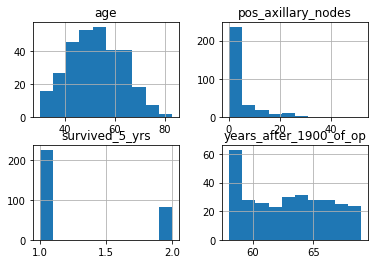

In [144]:
df.hist()

###Plot 2

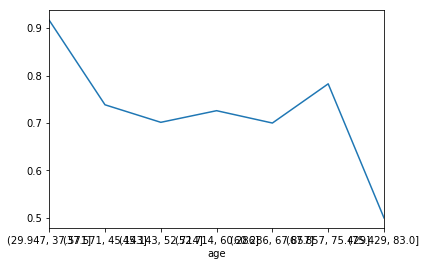

In [145]:
age_ct[('percent_survived')].plot(kind="line")

###Plot 3

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


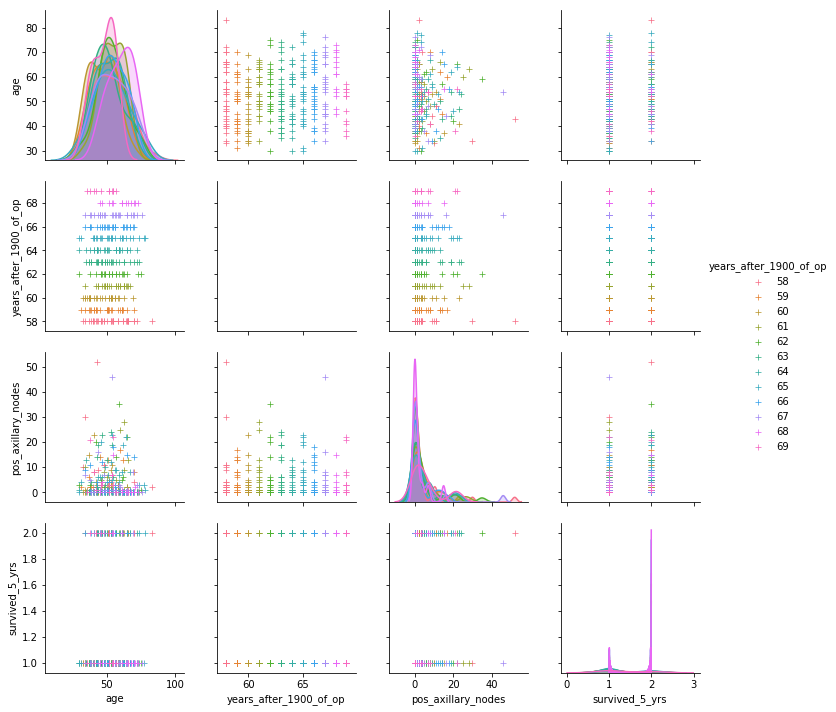

In [146]:
import seaborn as sns
sns.pairplot(df, hue="years_after_1900_of_op", markers="+")

###Plot 4

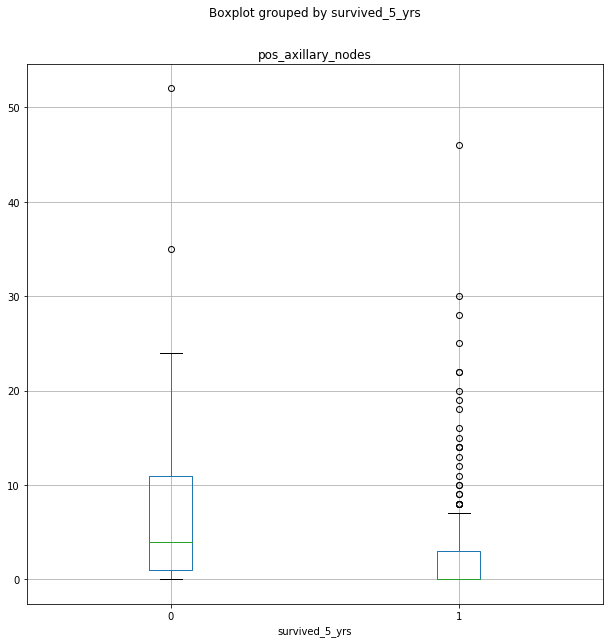

In [156]:
df.boxplot(column='pos_axillary_nodes', by='survived_5_yrs', figsize=(10,10))

###Plot 5

(array([63., 28., 26., 23., 30., 31., 28., 28., 25., 24.]),
 array([58. , 59.1, 60.2, 61.3, 62.4, 63.5, 64.6, 65.7, 66.8, 67.9, 69. ]),
 <a list of 10 Patch objects>)

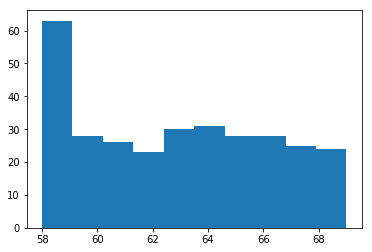

In [170]:
plt.hist(df['years_after_1900_of_op'])

The abnormally high number of surgeries during the first recorded year make me wonder whether it was the first year this hospital offered the procedure and there was some sort of backlog.

###Plot 6

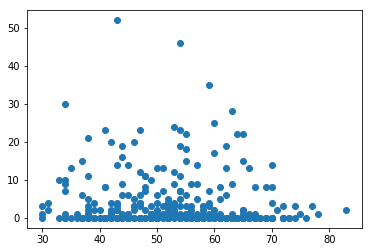

In [171]:
plt.scatter(df['age'], df['pos_axillary_nodes'])

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival? 
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

###What is at least one feature that looks to have a positive relationship with survival?
There is no feature with a positive relationship to survival that is not spurious. At the extremes, it could be said that youth (inversion of age) is positivly related with survival (Table 3). 

###What is at least one feature that looks to have a negative relationship with survival?
Positive axillary nodes (Plot 4), and Age (Table 3) both have negative relationships with survival.
On Plot #4 we can see that those who survived ('1') have far fewer axilary lymph nodes that tested positive for cancer. Infact, we see, more than 50% had none.

###How are those two features related with each other, and what might that mean?
Youth and axillary nodes represent a spurious correlation. Youth correlates positivley with survival because at the extremes (relativley yough/old) it represents the body's ability to recover from surgery. Positive axillary nodes represent the how far the cancer has spread, meaning surgery is more invasive, and survival less likely.